In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator, StatevectorSimulator, QasmSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Create a quantum circuit with 1 qubit (representing the magnetization state of the ferromagnetic material)
qc = QuantumCircuit(1)



In [3]:
# Step 2: Initialize the qubit in the |0> state (representing the initial unmagnetized state of the material)
qc.initialize([1, 0], 0)



In [4]:
# Step 3: Apply a Hadamard gate to simulate superposition (representing the application of a magnetic field to magnetize the material)
qc.h(0)



In [5]:
# Step 4: Apply a Pauli-X gate to simulate magnetization (representing the material becoming magnetized in the presence of an external field)
qc.x(0)



In [6]:
# Step 5: Apply a Phase gate to simulate energy losses and lag (representing the hysteresis effect as the magnetization lags behind the field)
qc.p(np.pi / 4, 0)



In [7]:
# Step 6: Reverse the magnetic field by applying another Pauli-X gate (representing the reversal of the external field)
qc.x(0)



In [8]:
# Step 7: Apply another Phase gate to simulate the remanence and coercivity (representing the material's resistance to demagnetization)
qc.p(np.pi / 2, 0)



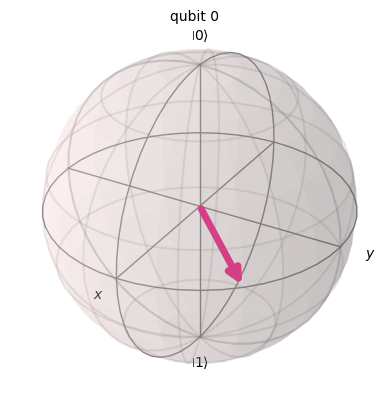

In [9]:
# Step 8: Visualize the qubit's state on the Bloch sphere to observe the hysteresis effect (lag between field and magnetization)
final_state = StatevectorSimulator().run(qc).result().get_statevector()


plot_bloch_multivector(final_state)



In [10]:
# Step 9: Measure the qubit to observe the final magnetization state (after the hysteresis loop is complete)
qc.measure_all()



In [11]:
# Step 10: Simulate the measurement and plot the results
result = QasmSimulator().run(qc,shot =1024).result()
counts = result.get_counts(qc)



Measurement results: {'1': 503, '0': 521}


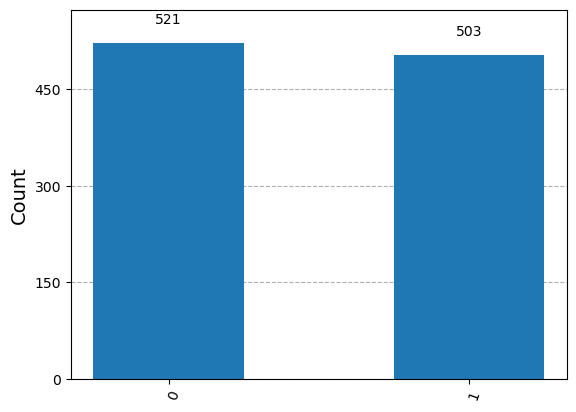

In [12]:
# Print the measurement results and plot the histogram (representing the final magnetization state of the material)
print(f"Measurement results: {counts}")
plot_histogram(counts)



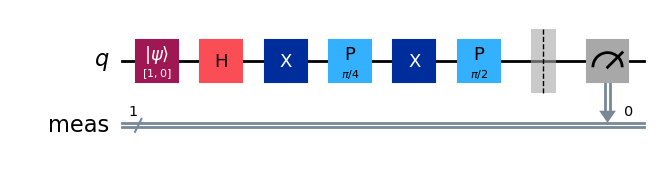

In [ ]:
# Draw the quantum circuit
qc.draw(output='mpl')
